# DATA MINING (COMP-541) PROJECT - 1
# Name : Chinmay Shukla
# Student id : 202727453

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Q1.

### -- In all there are 3 different data types in this data set that is int, float, object. ID, Hypertension, Heart disease and stroke are of the integer type whereas age, average glucose level and Body mass index or BMI are of the float type. Finally, gender, ever married, work type, residence type, smoking status, these are object date type. We have 12 columns and 5110 rows in this data set.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### -- None of the columns have empty rows. Only BMI has 201 empty as we can see below

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### - The table shows various summary statistics for each column, including the count of non-null values, the number of unique values, the most common value, and its frequency, as well as various measures of central tendency and dispersion such as the mean, standard deviation, minimum and maximum values, and quartiles.

In [5]:
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [6]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Q2

### - Stroke Frequency on different parameters is given below in the bar plots.

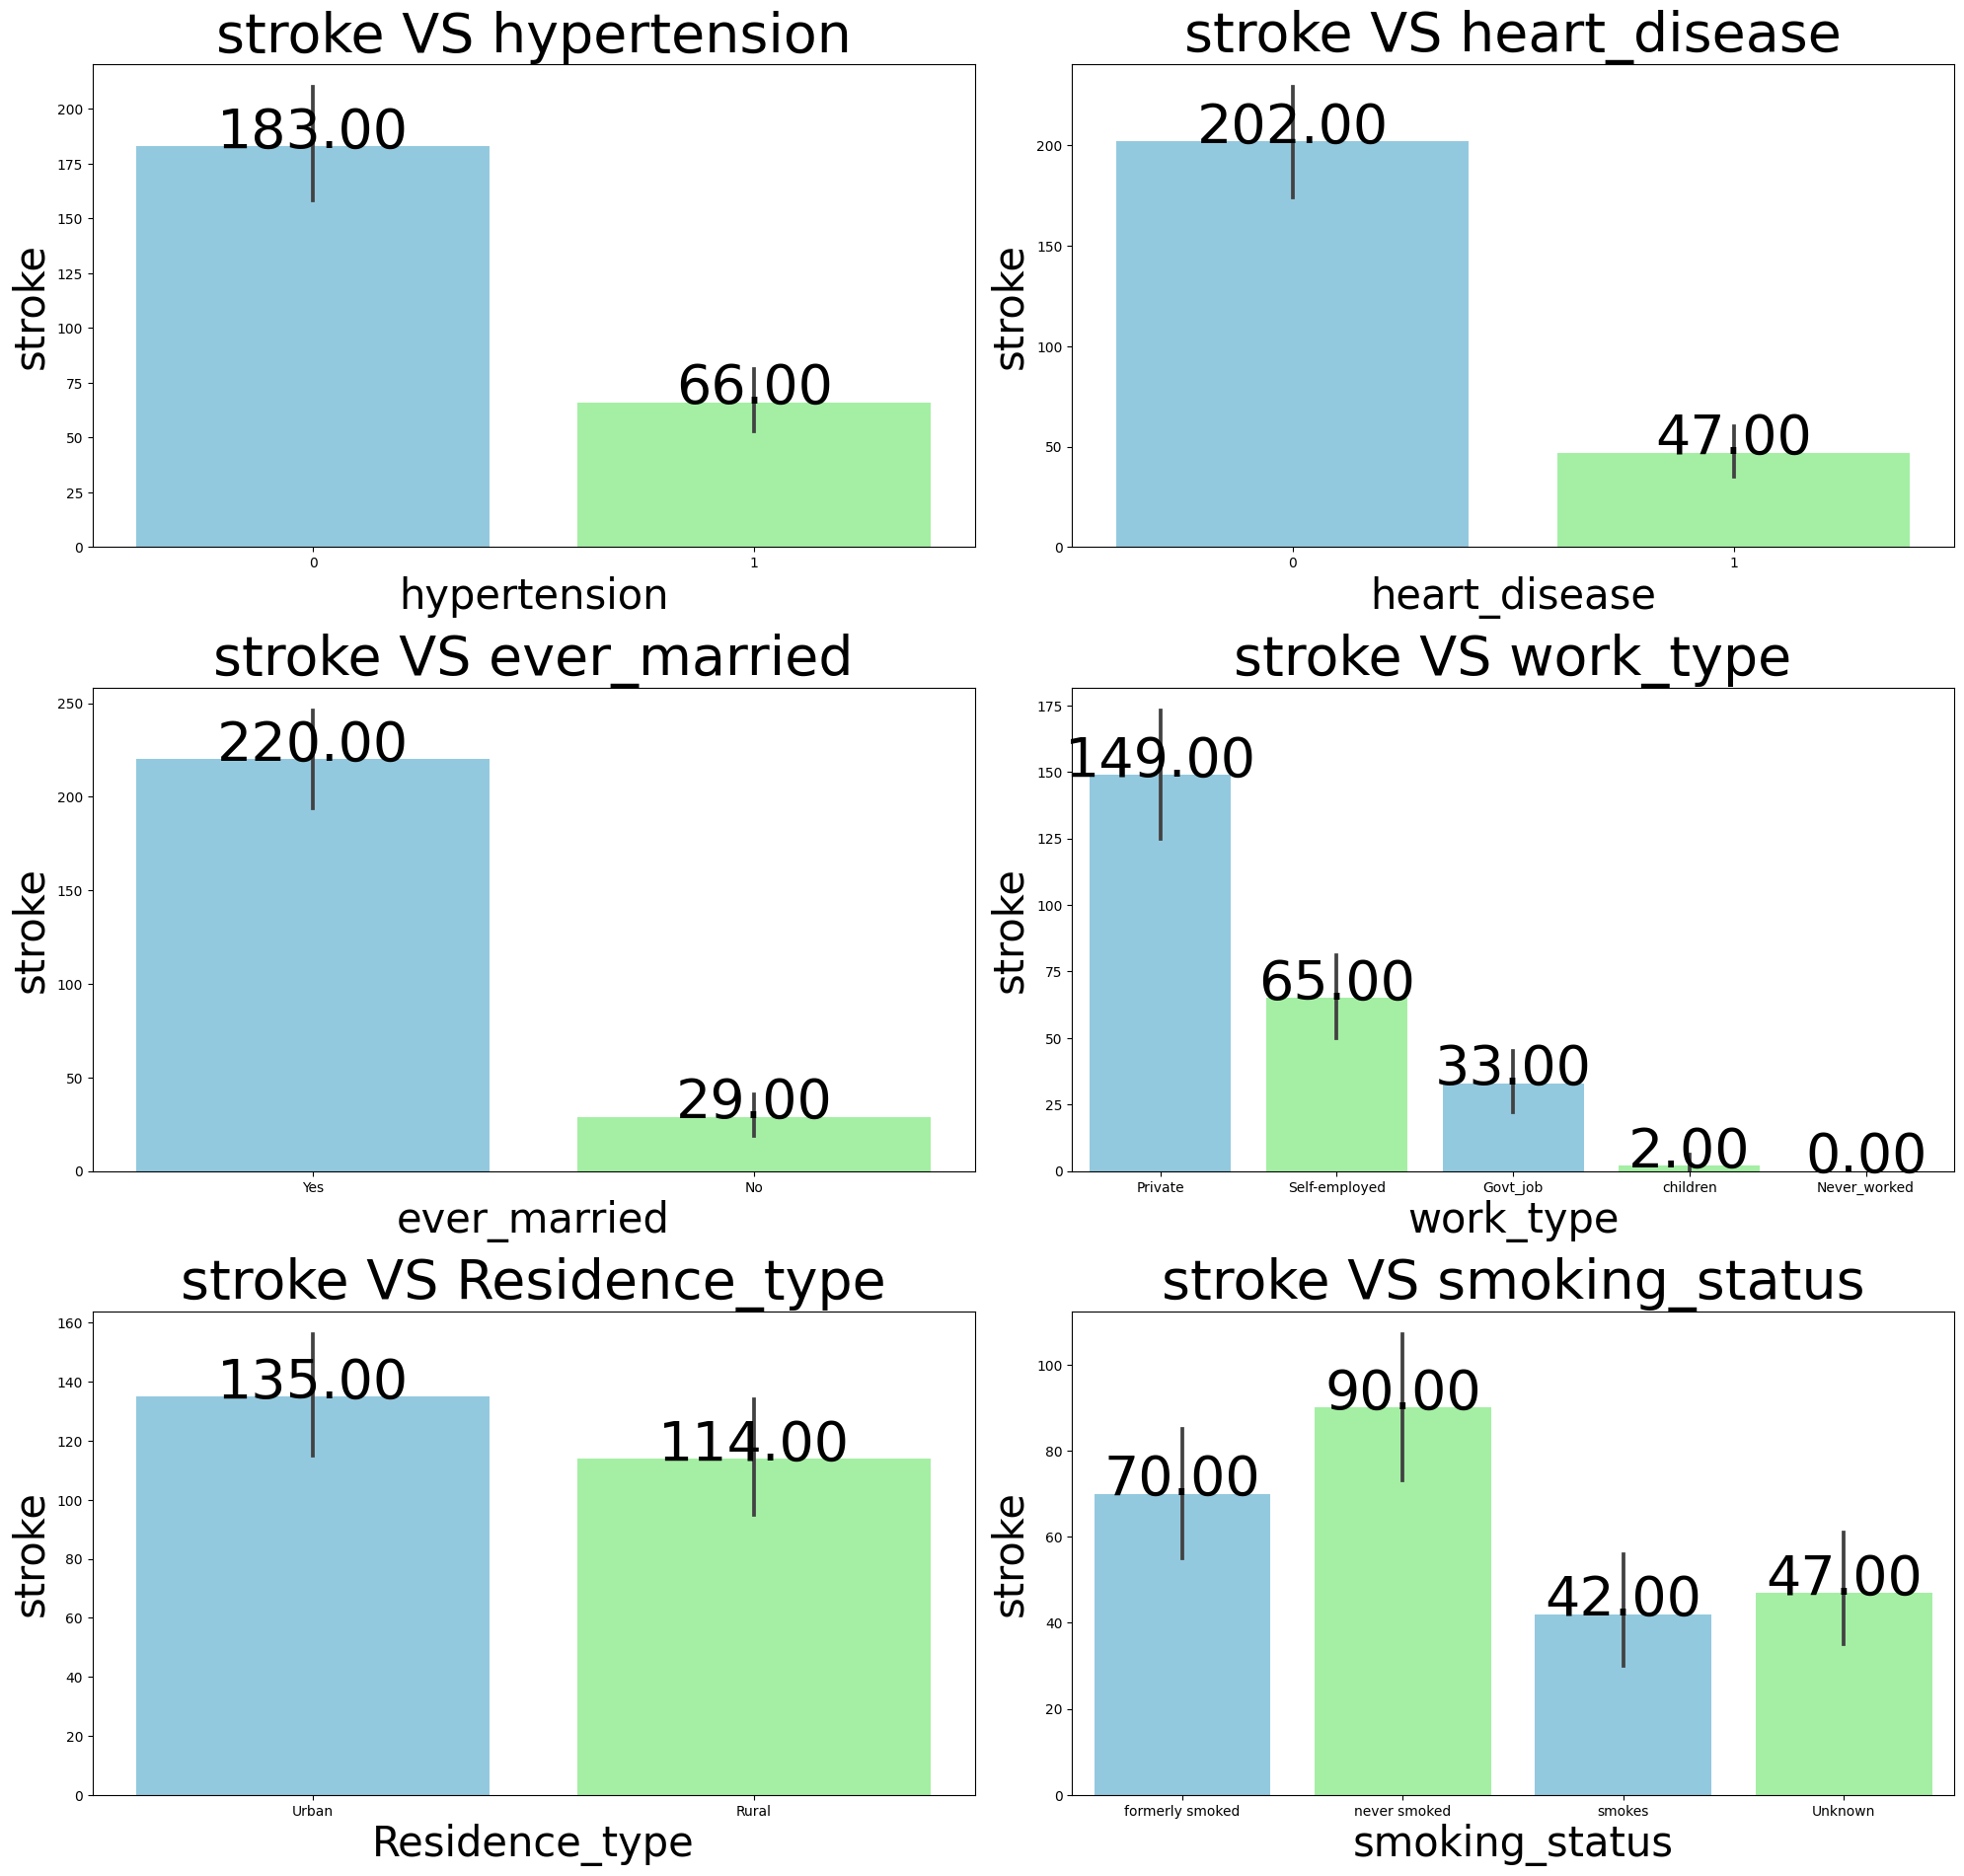

In [9]:
plt.figure(figsize=(20,50))
plotnumber=1
for i in df.columns:
    if i not in ['id','age',"avg_glucose_level","bmi","gender","stroke"]:
        plt.subplot(8,2,plotnumber)
        ax=sn.barplot(y=df['stroke'],x=df[i],estimator="sum", palette=["skyblue","palegreen"])
        for p in ax.patches:
            ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=40)
        plt.title(f"stroke VS {i}",fontsize=40)
        plt.xlabel(i,fontsize = 30)
        plt.ylabel('stroke',fontsize = 30)
        plotnumber+=1
        plt.tight_layout()

### Q3 

### - Shown below is the distribution plot obtained for the data set to understand how age impacts having a stroke. The red portion is the area that symbolizes not having a stroke. As we can see, almost all age groups till 100 have a huge possibility of not having a stroke. However, only from late 30s or 40 till the age of 90 are likely to have a stroke. The blue portion in the distribution plot symbolizes having a stroke.

<Figure size 2000x30000 with 0 Axes>

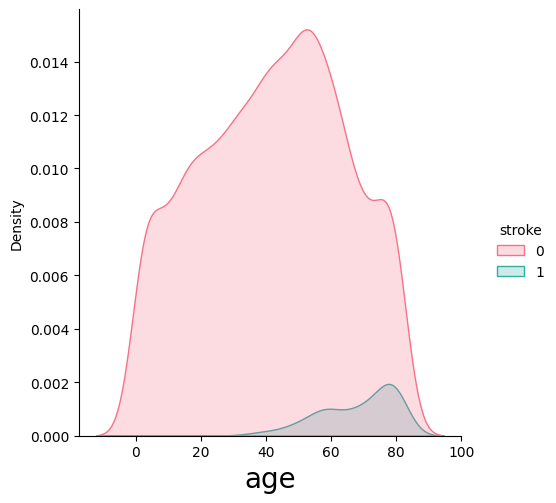

In [10]:
plt.figure(figsize=(20,300),facecolor='white')
sn.displot(df, x='age', hue='stroke', kind='kde', fill=True, palette='husl')
plt.xlabel("age",fontsize=20)
plt.show()

### Q4. 

### - Given below is the violin plot to understand patients likelihood of getting a stroke

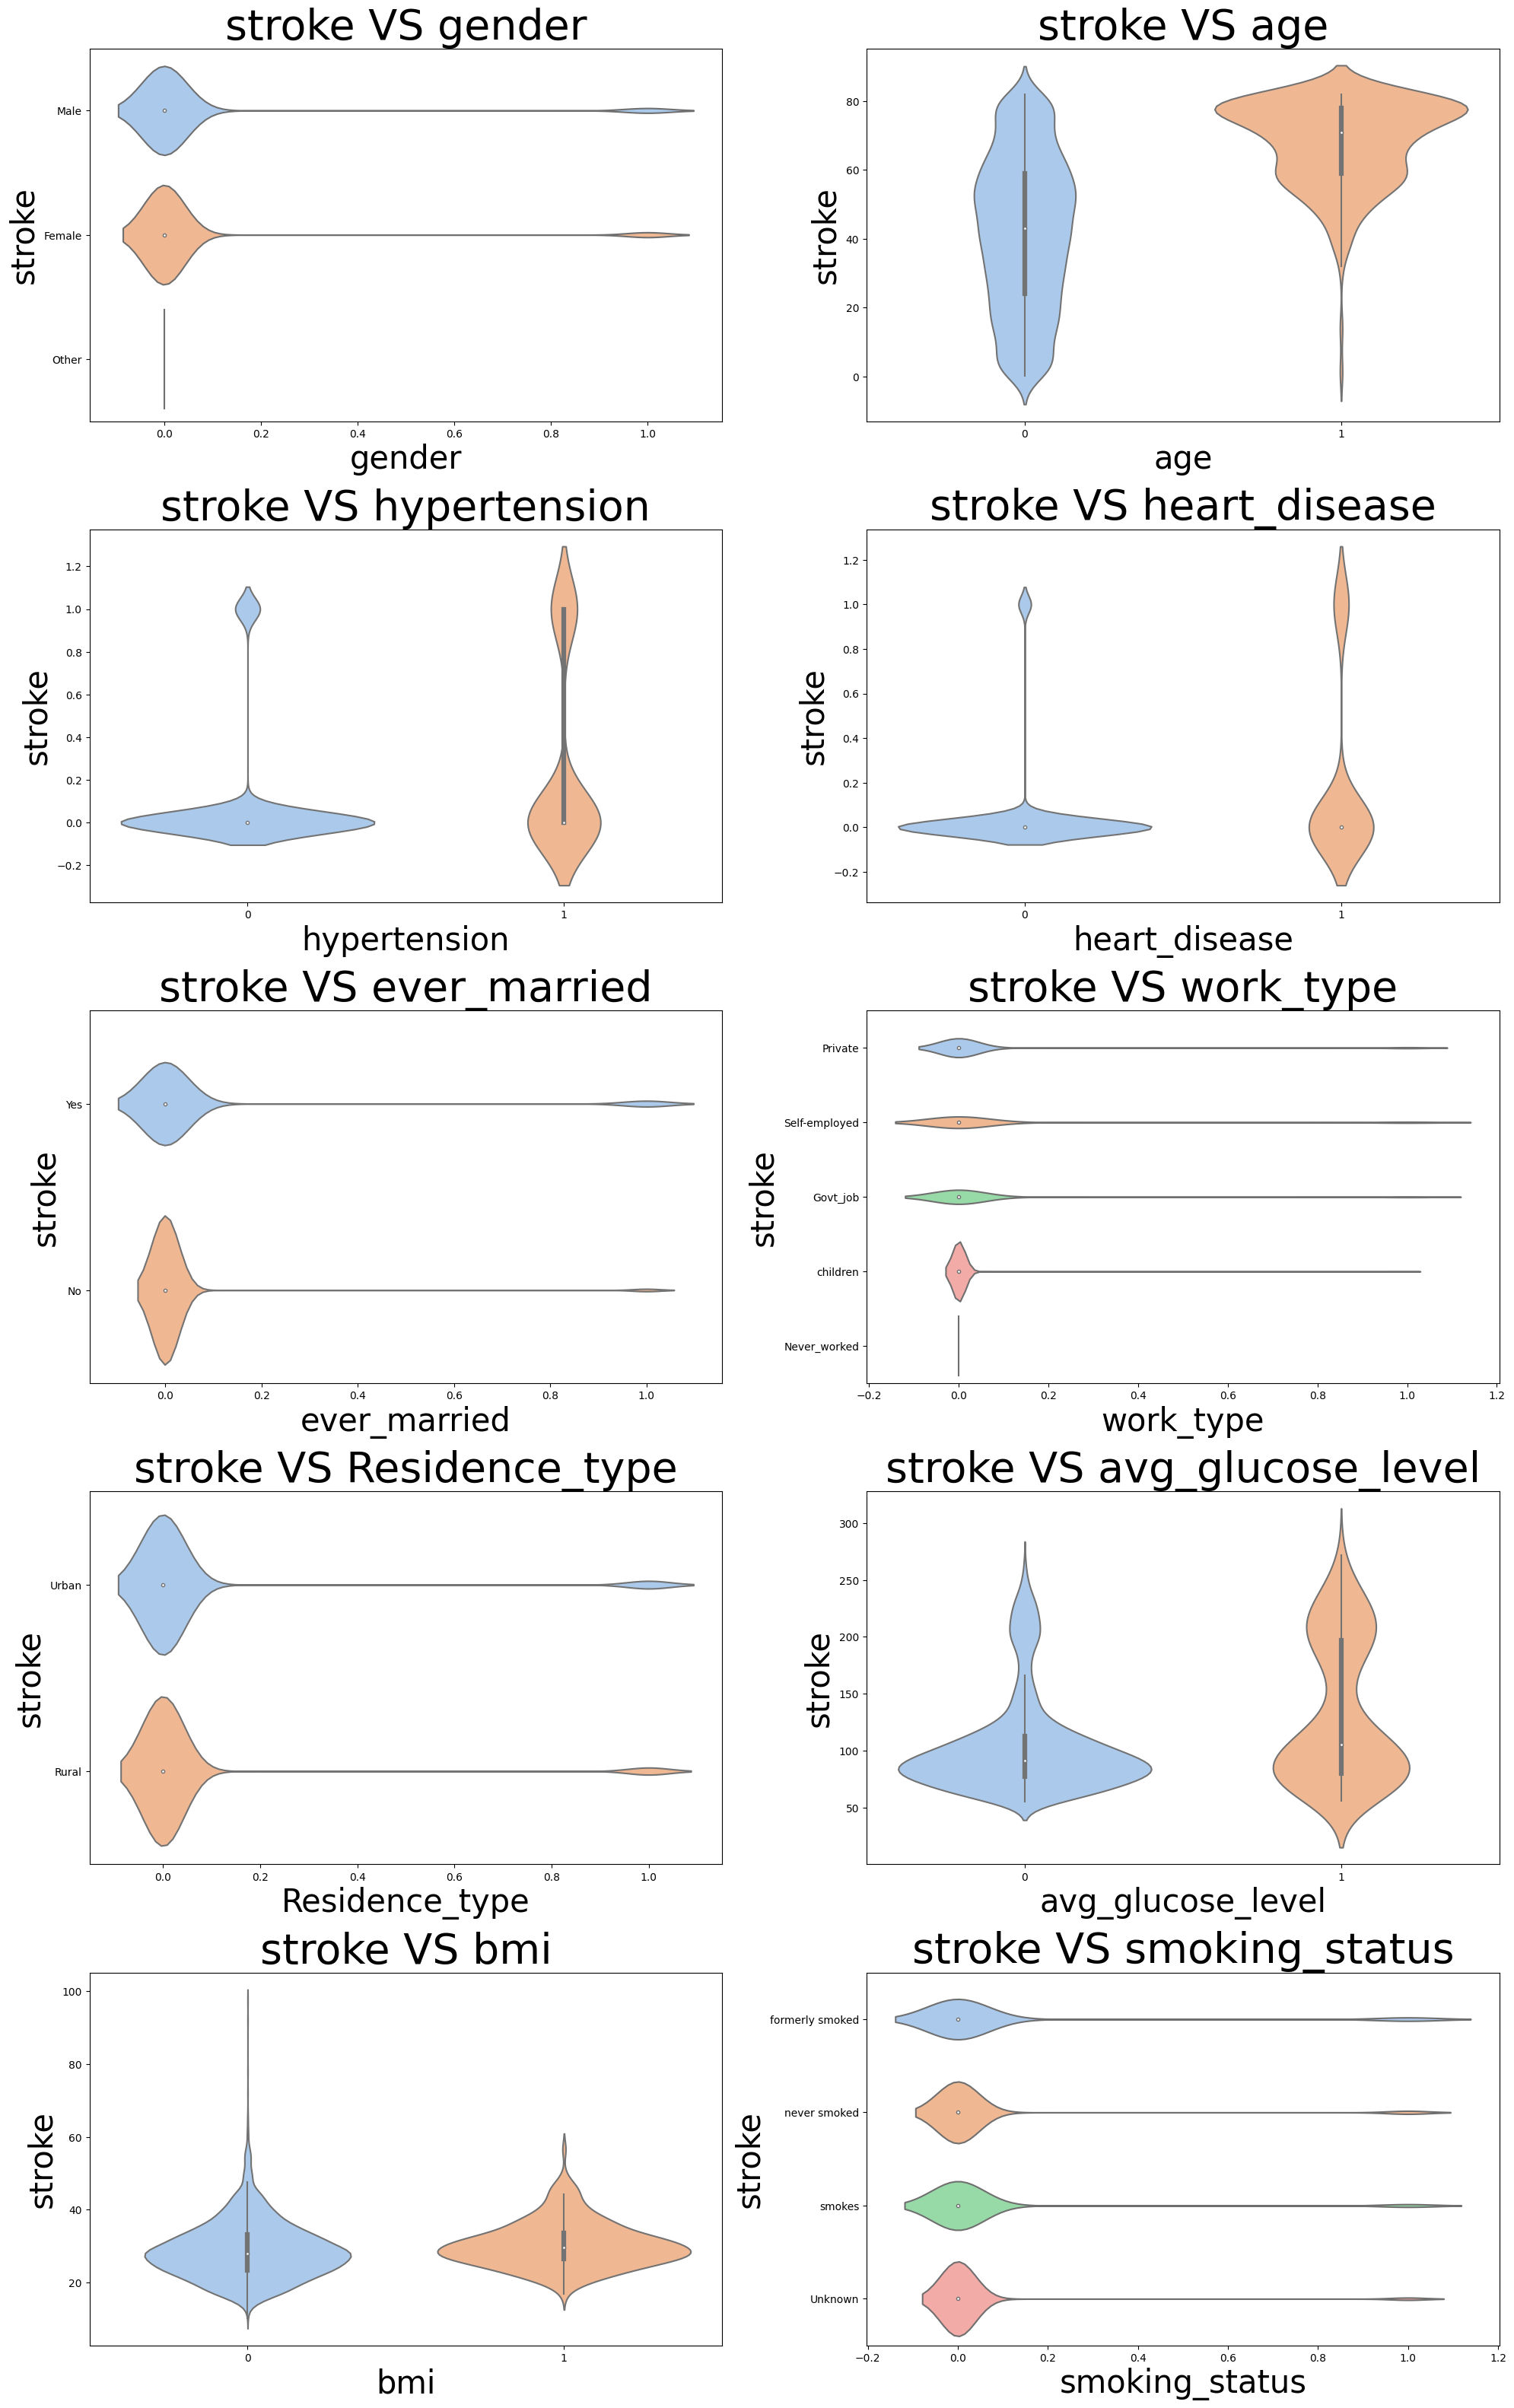

In [11]:
plt.figure(figsize=(20,50))
plotnumber=1
for i in df.columns:
    if i not in ['id',"stroke"]:
        plt.subplot(8,2,plotnumber)
        sn.violinplot(data=df, x='stroke', y=i, palette='pastel')
        plt.title(f"stroke VS {i}",fontsize=40)
        plt.xlabel(i,fontsize = 30)
        plt.ylabel('stroke',fontsize = 30)
        plotnumber+=1
        plt.tight_layout()

### Q5. 

### After observing the plot below, it is safe to say that the data set is imbalanced.

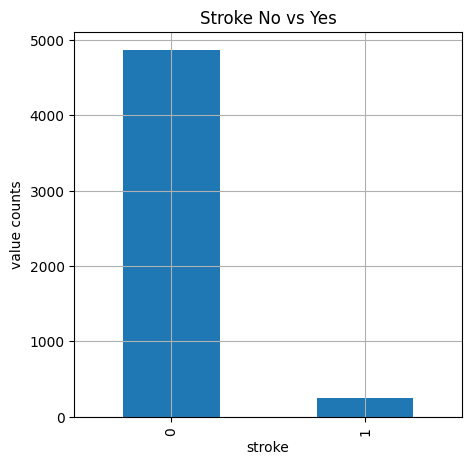

In [12]:
plt.figure(figsize=[5,5])
df['stroke'].value_counts().plot(kind='bar')
plt.xlabel("stroke")
plt.ylabel('value counts')
plt.title('Stroke No vs Yes')
plt.grid()

In [13]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### Q6.

### - The variables with a strong correlation have a brighter colour whereas the variables without a strong correlation have a lighter or a weaker colour. In the heatmap given below, the boxes with a 1 in them represents absolute correlation. The second strongest correlation in the given heatmap is between age and bmi with 0.33, other than that age typically has a good correlation with all other variables with its correlation with average glucose level being the lowest at 0.24. However, this is still higher than other variable's correlation amongst each other excluding age. ID has the lowest correlation with all other variables whereas age has the strongest correlation with all other variables. 


C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\2616218096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),cmap='YlGnBu',annot = True)


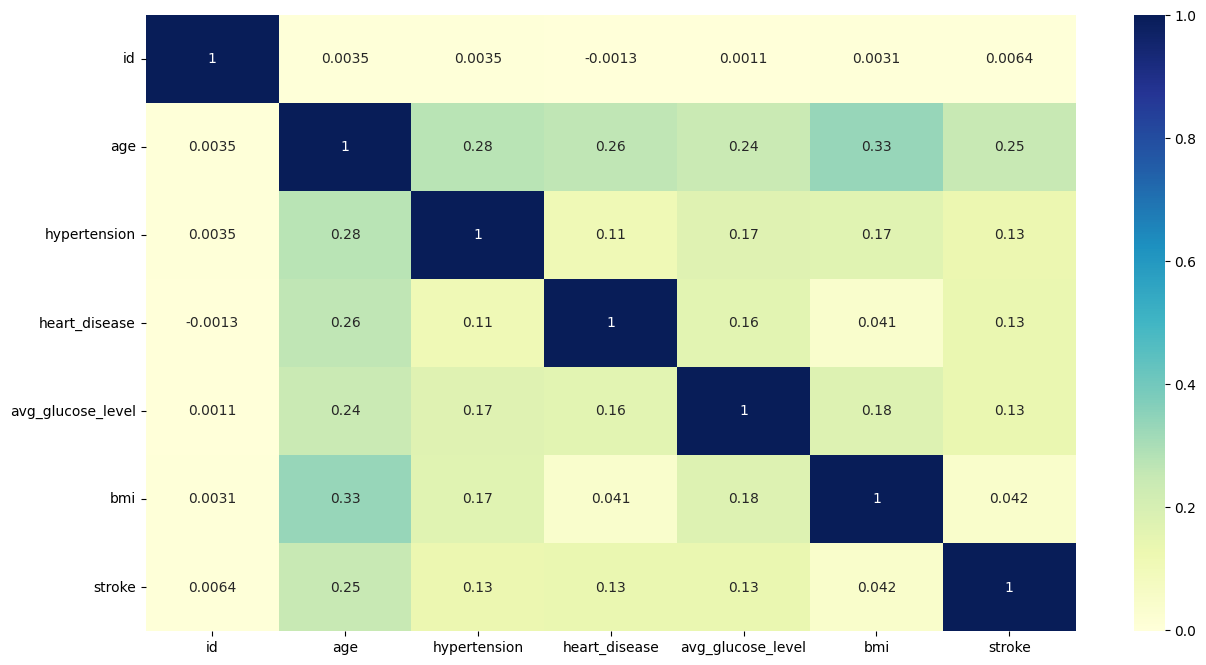

In [14]:
plt.figure(figsize=(15,8))
sn.heatmap(df.corr(),cmap='YlGnBu',annot = True)
plt.show()

### Q7. 

### -  plot with outliers

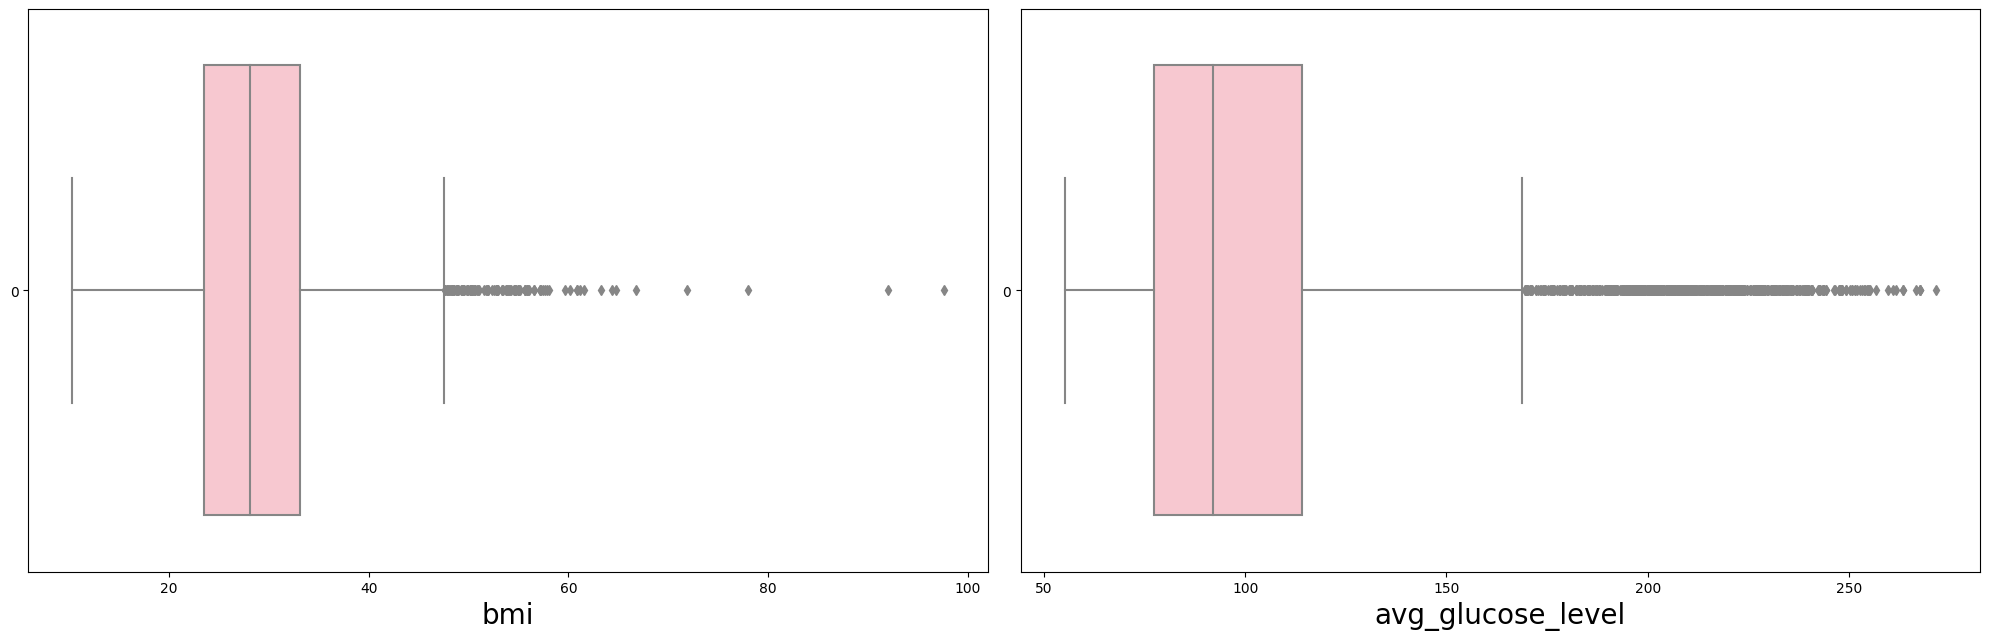

In [15]:
outlier_columns=['bmi','avg_glucose_level']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in outlier_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(df[column],color='pink',orient="h")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
import scipy.stats as stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3-Q1

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df[outlier_columns] < (Q1-1.5*IQR)) | (df[outlier_columns] > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.reset_index(inplace=True)
data_clean

C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\1787452037.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(q=.25)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\1787452037.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(q=.75)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\1787452037.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = df[~((df[outlier_columns] < (Q1-1.5*IQR)) | (df[outlier_columns] > (Q3+1.5*IQR)

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
4,9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
4397,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4398,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4399,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### plot with reduced outliers

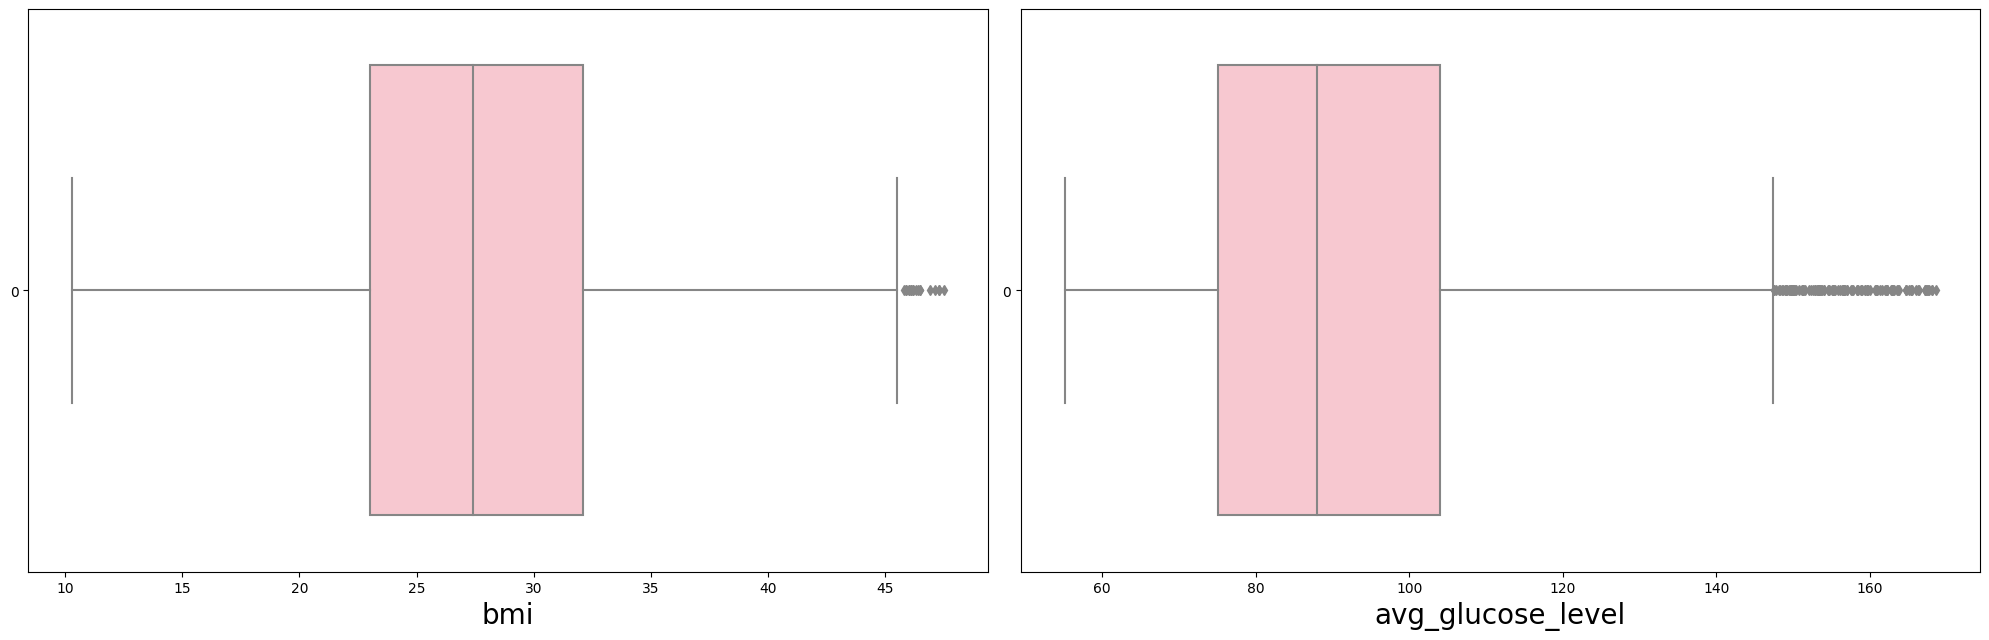

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in outlier_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data_clean[column],color='pink',orient="h")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [18]:
import scipy.stats as stats
Q1 = data_clean.quantile(q=.25)
Q3 = data_clean.quantile(q=.75)
IQR = Q3-Q1

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean_more = data_clean[~((data_clean[outlier_columns] < (Q1-1.5*IQR)) | (data_clean[outlier_columns] > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean_more.reset_index(inplace=True)
data_clean_more

C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\1291537138.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data_clean.quantile(q=.25)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\1291537138.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data_clean.quantile(q=.75)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\1291537138.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean_more = data_clean[~((data_clean[outlier_columns] < (Q1-1.5*IQR)) 

,level_0,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,1,6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,2,7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,3,8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
4,4,9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4395,5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4259,4396,5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
4260,4397,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4261,4398,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


### plot without outliers. 

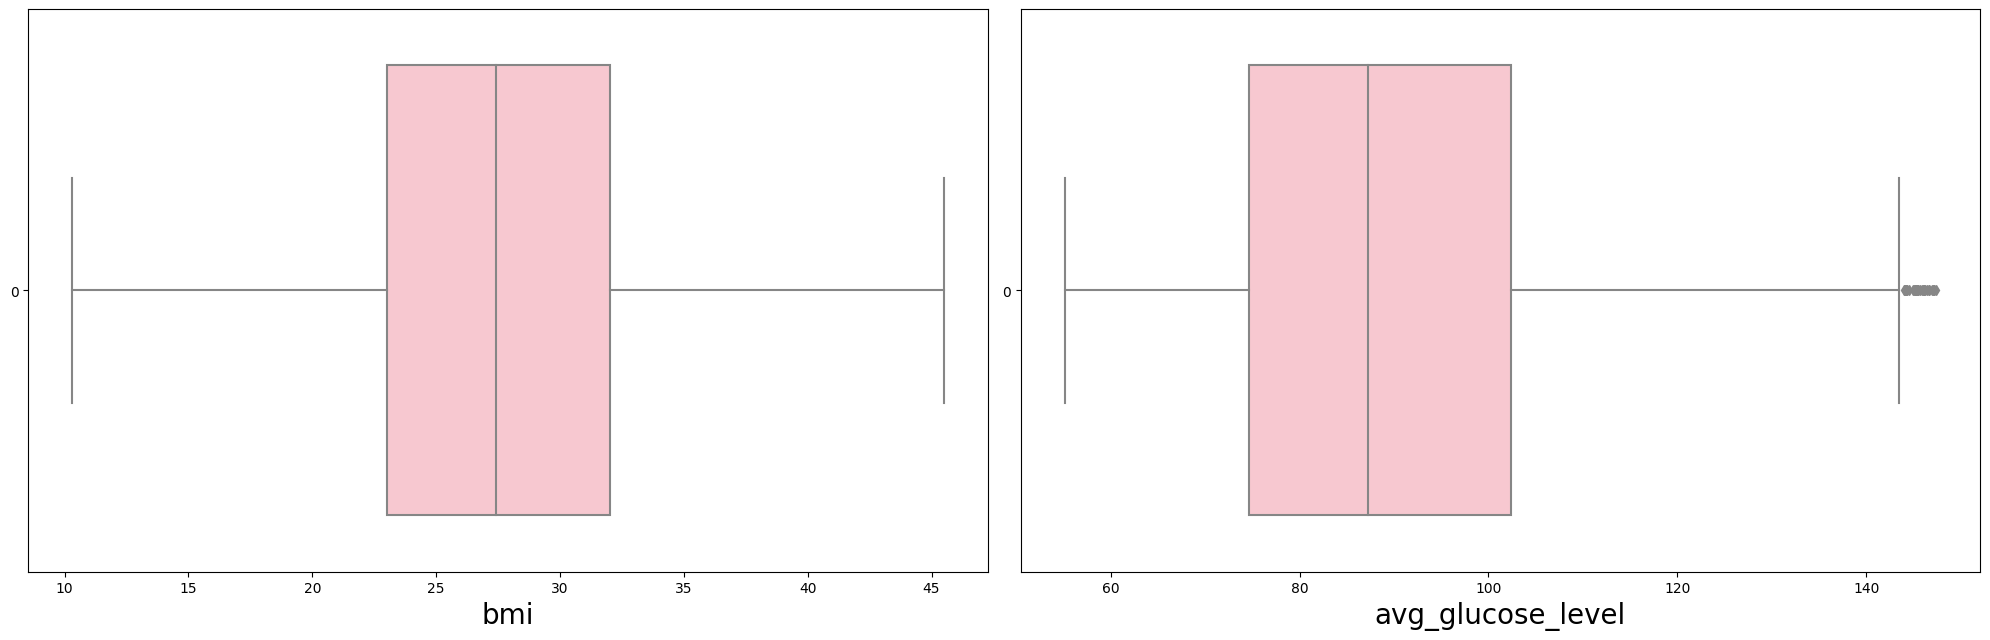

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in outlier_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data_clean_more[column],color='pink',orient="h")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [20]:
data_clean_more.isna().sum()

level_0                0
index                  0
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  136
smoking_status         0
stroke                 0
dtype: int64

### Q9. 

### - Transforming the variables that are an object data type.

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
object_cols = data_clean_more.select_dtypes(include=['object']).columns.tolist()

# Instantiate a LabelEncoder object
le = LabelEncoder()

# Encode each object column
for col in object_cols:
    data_clean_more[col] = le.fit_transform(data_clean_more[col])

# Print the encoded data
data_clean_more

C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\382444859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_more[col] = le.fit_transform(data_clean_more[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\382444859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_more[col] = le.fit_transform(data_clean_more[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\382444859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,level_0,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
1,1,6,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
2,2,7,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
3,3,8,27419,0,59.0,0,0,1,2,0,76.15,NaN,0,1
4,4,9,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4395,5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4259,4396,5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
4260,4397,5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4261,4398,5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0


In [23]:
data_clean_more.drop(["index","level_0"],axis=1,inplace=True)
data_clean_more

C:\Users\Dell\AppData\Local\Temp\ipykernel_1288\3017580213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_more.drop(["index","level_0"],axis=1,inplace=True)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
1,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
2,10434,0,69.0,0,0,0,2,1,94.39,22.8,2,1
3,27419,0,59.0,0,0,1,2,0,76.15,NaN,0,1
4,60491,0,78.0,0,0,1,2,1,58.57,24.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4258,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4259,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
4260,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4261,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
